In [1]:
import tensorflow as tf
import matplotlib as mpl
import pandas as pd

In [2]:
mpl.rcParams['figure.figsize'] = (20, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
def is_gzip_file(filepath):
    with open(filepath, 'rb') as f:
        return f.read(2) == b'\x1f\x8b'
def display_all(df):
    plot_cols = df.columns
    plot_features = df[plot_cols]
    plot_features.index = df.index
    _ = plot_features.plot(subplots=True)

    plot_features = df[plot_cols][:960]
    plot_features.index = df.index[:960]
    _ = plot_features.plot(subplots=True)

In [10]:
csv_path = tf.keras.utils.get_file(
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/merge_15min.csv.zip')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/device-1_filled.csv.zip')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/era5-land_timeseries_filled.csv.zip')
    origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/device-1.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/export_device_1_basic_aggregated_1hour.csv.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/utci_selected_timeseries.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/era5-hourly_timeseries.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/era5-land_timeseries.csv.tar.gz')
csv_path

'C:\\Users\\ASUS\\.keras\\datasets\\device-1.csv.tar.gz'

In [11]:
if is_gzip_file(csv_path):
  # Read the data directly into a pandas DataFrame
  df = pd.read_csv(csv_path, compression='gzip')
else:
  # Read the data without compression
  df = pd.read_csv(csv_path)
df = df.rename(columns={df.columns[0]: 'datetime'})
row_count = df.shape[0]
print(f"Total rows: {row_count}")
df.head(5)

Total rows: 138239


,datetime,ambient_temperature,current_power,current_value_of_consumption,external_energy_supply,grid_feed_in,internal_power_supply,self_consumption,temperature_measurement,total_irradiation
0,2021-11-06 11:15:00,30.288889,46519.355556,37280.422222,NaN,9238.933333,37280.422222,37280.422222,58.022222,798.444444
1,2021-11-06 11:30:00,30.076923,47600.714286,39472.626374,NaN,9397.756098,39132.406593,39132.406593,58.263736,812.571429
2,2021-11-06 11:45:00,30.629213,47056.988764,32669.393258,NaN,14387.595506,32669.393258,32669.393258,57.235955,807.224719
3,2021-11-06 12:00:00,31.021978,48415.835165,36126.516484,NaN,12289.318681,36126.516484,36126.516484,56.846154,817.527473
4,2021-11-06 12:15:00,31.831461,49345.404494,36879.966292,NaN,12465.438202,36879.966292,36879.966292,55.842697,816.651685


In [12]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)

In [13]:
# Convert 'timestamp' column to datetime
df = df.set_index('datetime')

print(df.index.year.unique())
print(df.index.year.value_counts())

Index([2021.0, 2022.0, 2023.0, 2024.0, 2025.0, nan], dtype='float64', name='datetime')
datetime
2024.0    35136
2023.0    35040
2022.0    35040
2025.0    27691
2021.0     5331
Name: count, dtype: int64


In [14]:
start = df.index.min()
end = df.index.max()
print(start)
print(end)

2021-11-06 11:15:00
2025-10-16 10:30:00


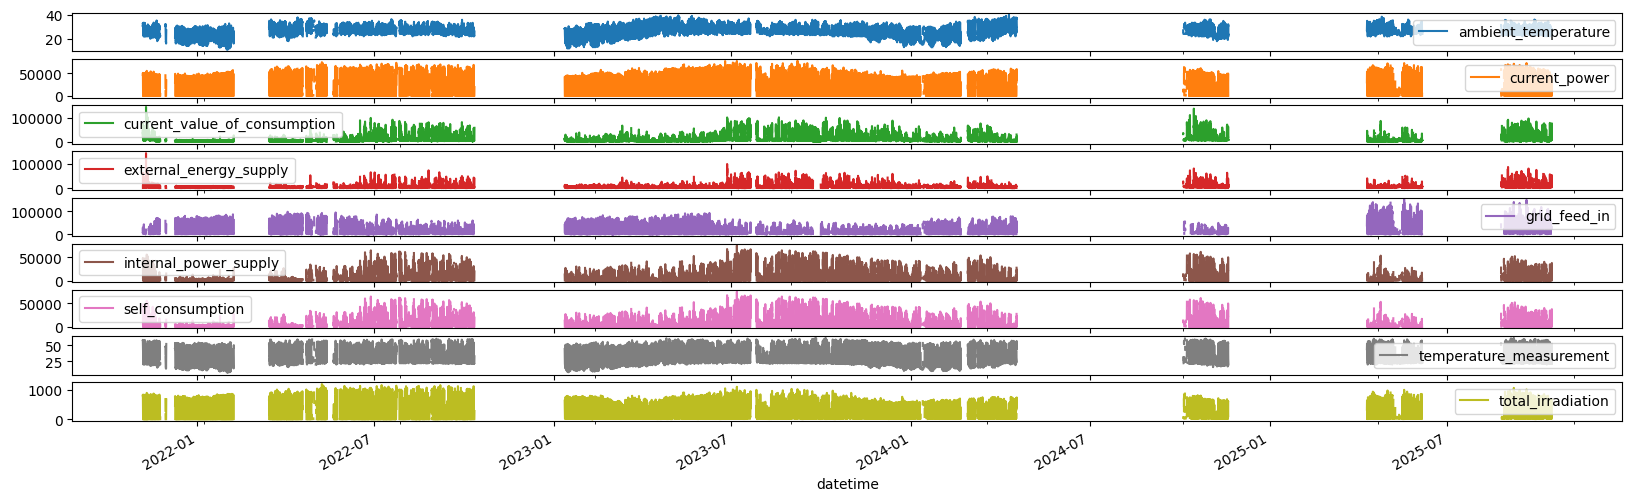

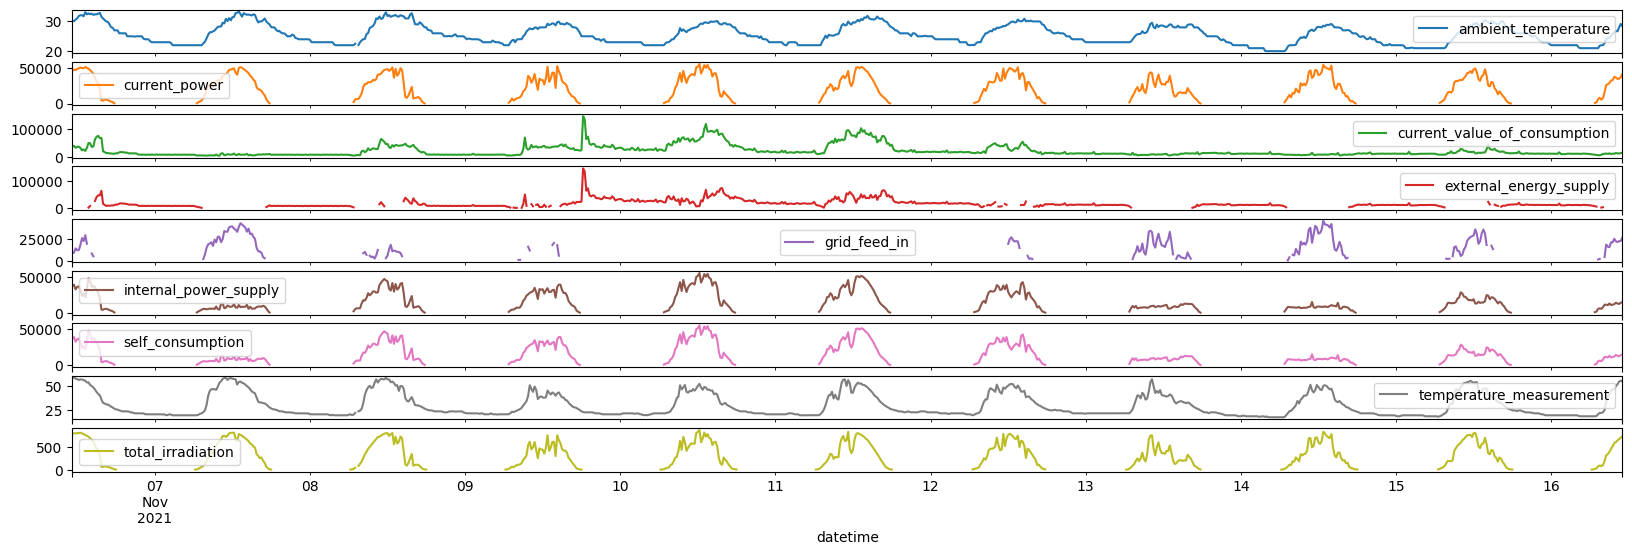

In [15]:
display_all(df)